In [37]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image

In [18]:
# Importando o dataset
df = pd.read_csv('dataset_einstein.csv', delimiter=';')

# Lendo as primeiras 5 linhas
print(df.head(5))

        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes. 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes. 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                     

In [19]:
# Pegando os numeros dos registros
count_row = df.shape[0]

#Pegando os numeros de colunas
count_col = df.shape[1]

print(count_col)
print(count_row)

11
5644


Deixar o dataset somente com os registros que tenham todos os campos preenchidos

In [20]:
# remover os registros que pelo menos um campo esta em branco
df = df.dropna()
# print(df.head(5))

print('Quantidade de colunas: ', df.shape[1])
print('Total de registros: ', df.shape[0])

Quantidade de colunas:  11
Total de registros:  357


In [23]:
#verificar se o banco esta balanceado
print('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] == 'negative'].shape[0])
print('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] == 'positive'].shape[0])

Total de registros negativos:  302
Total de registros positivos:  55


Convertendo o datafreme para um Array Numpy e separar o dataset em dois.

In [24]:
# Jogar as etiquetas para Y
Y = df['SARS-Cov-2 exam result'].values
print('Etiqueta Y: ', Y)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']].values
print('Etiqueta X: ', X)


Etiqueta Y:  ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'neg

Dividir o dataset em treino(80%) e teste(20%)

In [26]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)

Treinando o modelo

In [33]:
# Criando o algoritimo que sera do tipo 'Arvore de Decisao'
algoritimo_arvore = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Treinando o algortimo e criando o modelo
modelo = algoritimo_arvore.fit(X_treino, Y_treino)


Mostrando a arvore para entender melhor como ele decidiu e verificar se e whitebox

[0.13553694 0.52890209 0.18040441 0.15515656]


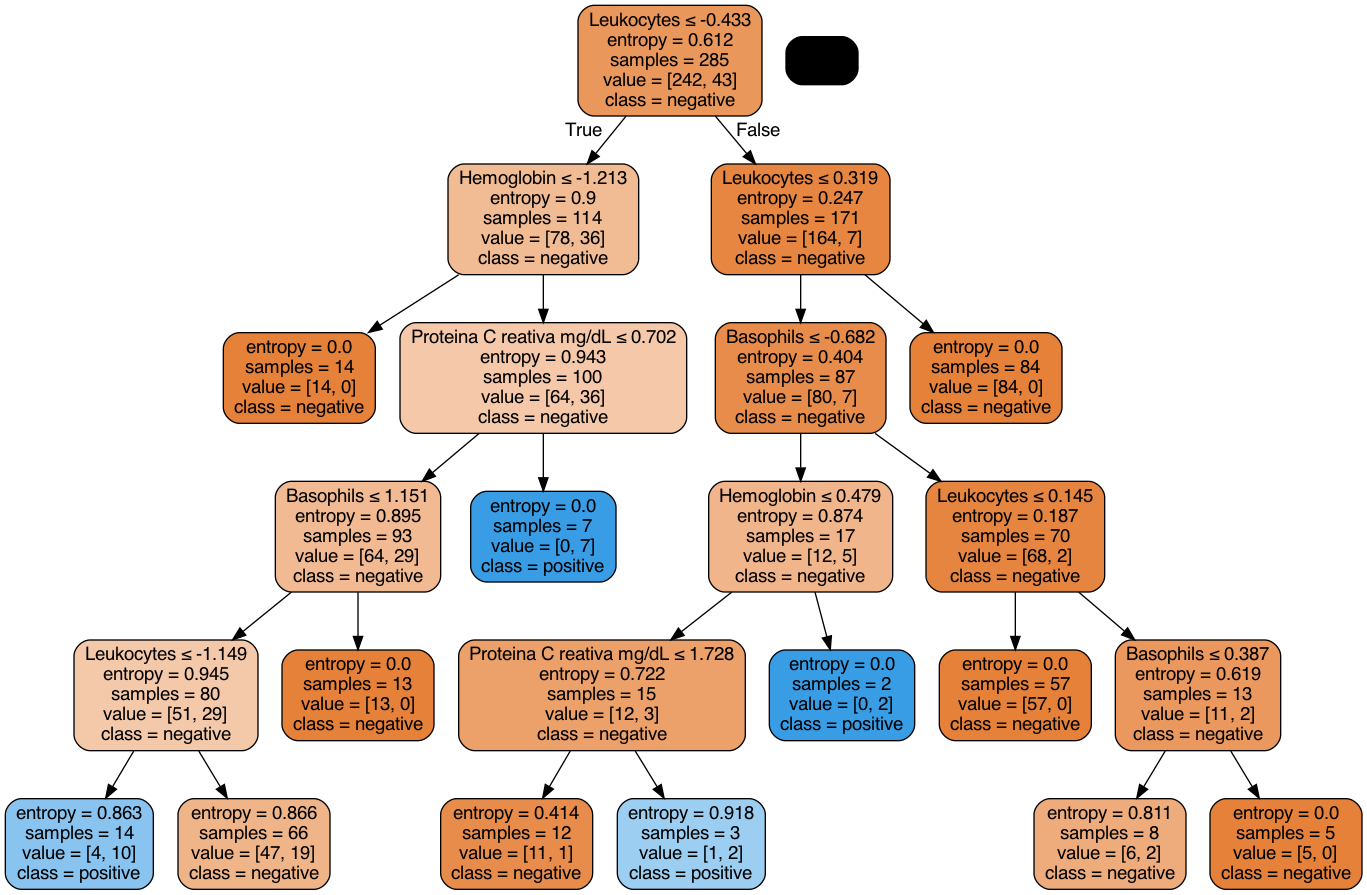

In [41]:

#Mostrando a feature mais importante
print(modelo.feature_importances_)

nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']
nome_classes = modelo.classes_

#Mostrando a imagem da arvore
dot_data = StringIO()

export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png('arvore.png')
Image('arvore.png')

Identificar a feature com maior importancia para o modelo

Feature Ranking: 
1. feature 1 (0.528902)
2. feature 2 (0.180404)
3. feature 3 (0.155157)
4. feature 0 (0.135537)


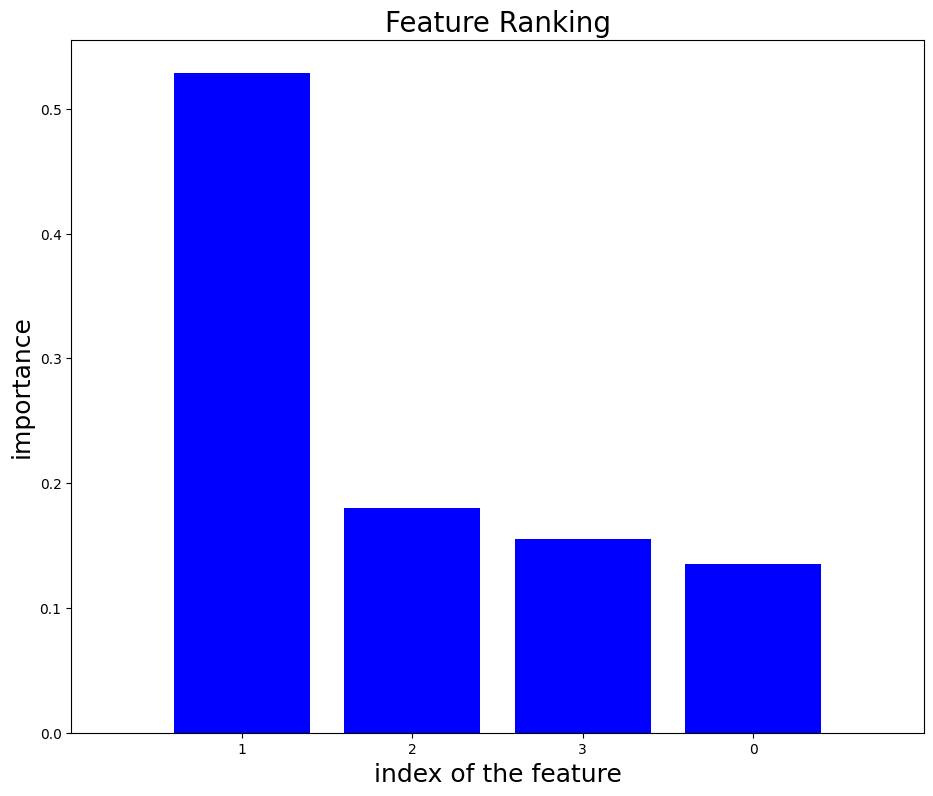

In [42]:
# Plotando o grafico para comparar cada feature
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print('Feature Ranking: ')

for feature in range(X.shape[1]):
    print('%d. feature %d (%f)' % (feature + 1, indices[feature], importances[indices[feature]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Feature Ranking', fontsize=20)
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel('importance', fontsize=18)
plt.xlabel('index of the feature', fontsize=18)
plt.show()

#indice das features
# 0 - Hemoglobina
# 1 - Leucocitos
# 2 - Basolifos
# 3 - Proteina C reativa mg/dL

Aplicando o modelo para o teste (20%)

In [44]:
# aplicando o modelo na base de teste e armazenando em Y_predicoes
Y_predicoes = modelo.predict(X_teste)

#avaliacao do modelo entre o valor real do data set teste com as predicoes
print('Acuracia da Arvore: ', accuracy_score(Y_teste, Y_predicoes))
print(classification_report(Y_teste, Y_predicoes))

# Presision: quantas predicoes eram realmente corretas?
# Recall: quantos datapoints o modelo conseguiu classificar corretamente

Acuracia da Arvore:  0.8472222222222222
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



Entendendo a matriz de confusao

Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


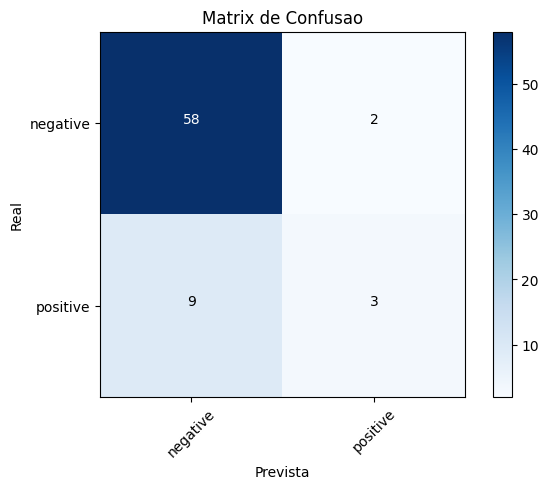

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')

